# Market Basket Analysis
### Donald Bango
### 24 April 2024
### Dr. Aiman Darwiche


# Market Basket Analysis with Apriori Algorithm

## Introduction:
The task involves Market Basket Analysis (MBA) using the Apriori algorithm on a grocery dataset. The dataset contains transactions of the form "If {x1, x2, ..., xn}, then {y1, y2, ..., yk}".

An example might look like If {bread, milk}, then {eggs, cheese}
This transaction might indicate that if a customer buys bread and milk, they are likely to also buy eggs and cheese.

## Data Preprocessing:
The 'Groceries dataset' is loaded from a CSV file downloaded from kaggle using pandas. Preprocessing involves creating a basket dataframe where each row represents a member's transaction and each column represents an item.

Link:https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset

## Association Rule Mining:
The Apriori algorithm is employed to mine association rules. A function, frequently_bought_together, is defined to find items frequently bought together with a given item. Support, confidence, lift metrics are used to evaluate the association rules.

## Analysis of Results:
Association rules can be analyzed to identify frequently co-occurring items. The visualizations serve to aid in understanding the strength and direction of underlying associations between items.

## Conclusion:
The findings from association rule mining provide insights into customer purchasing behavior. Potential applications include targeted marketing, shelf organization, and inventory management.

---

### Explain the Apriori Algorithm:

**Market Basket Analysis:** Analyzing customer purchase patterns to discover relationships between items frequently bought together.

**Support:** The frequency of occurrence of an itemset in the dataset.

Support for an item A can be calculated using the formula: Support(A) = (Number of Transactions Containing A) / (Total Number of Transactions).

**Confidence:** The conditional probability of buying the consequent item given that the antecedent item is purchased.

(A -> C) = Support(A -> C) / Support(A)
where A denotes the antecedent and C signifies the consequent.

**Lift:** The ratio of observed support to the expected support if the two items were independent.
Lift > 1 indicates a positive association. Lift measures how much more often the antecedent and consequent occur together compared to their individual occurrences. A lift score less than 1 suggests a negative association, indicating that if the antecedent is purchased, it is unlikely that the consequent will be purchased. A lift score of 1 indicates no association between the items. 

Lift is calculated using the formula: Lift(A -> C) = (Confidence(A -> C)) / (Support(C)).

**Apriori Algorithm:** An algorithm for frequent itemset mining in transactional databases. It uses a breadth-first search strategy to discover frequent itemsets, iterating over candidate itemsets and pruning those that do not meet minimum support thresholds. This process efficiently identifies itemsets with significant support, which are then used to generate association rules for market basket analysis and other applications in data mining.

**breadth-first search (BFS) algorithm:** is a graph traversal technique that systematically explores all neighbor nodes at the present depth level before moving on to nodes at the next depth level. It starts at a specified node and explores all of its neighbors before moving to the next level of neighbors. This process continues until all reachable nodes have been visited. BFS is typically implemented using a queue data structure to keep track of nodes to be visited, ensuring that nodes are visited in the order they were discovered, level by level.

---

**Dataset Information:**

The dataset is provided under the GNU General Public License version 2 (GPL-2.0). It was contributed by user HEERAL DEDHIA on Kaggle.


In [93]:
# Required Packages
from mlxtend.frequent_patterns import apriori,association_rules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
from collections import Counter
from IPython.display import Image
from warnings import filterwarnings
filterwarnings("ignore")

In [94]:
# Import dataset
data = pd.read_csv('/Users/don/Downloads/Groceries_dataset.csv')


### Exploratory Data Analysis


In [95]:
data.shape

(38765, 3)

In [96]:
data.head(10)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


In [97]:
data.nunique()

Member_number      3898
Date                728
itemDescription     167
dtype: int64

In [98]:
data.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [99]:
data["itemDescription"].value_counts().head(5)

whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
Name: itemDescription, dtype: int64

In [100]:
# Visualize popular items
popular_items = data['itemDescription'].value_counts().head(10)
print("Top 10 popular items:")
print(popular_items)


Top 10 popular items:
whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: itemDescription, dtype: int64


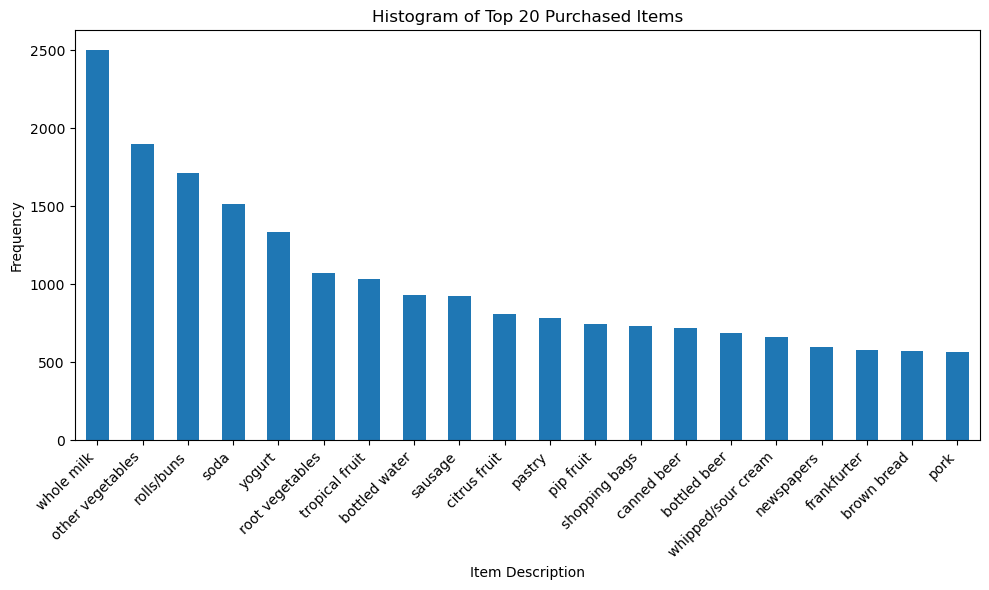

In [101]:
import matplotlib.pyplot as plt

# Create a histogram of all items
plt.figure(figsize=(10, 6))
data['itemDescription'].value_counts().head(20).plot(kind='bar')
plt.title('Histogram of Top 20 Purchased Items')
plt.xlabel('Item Description')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




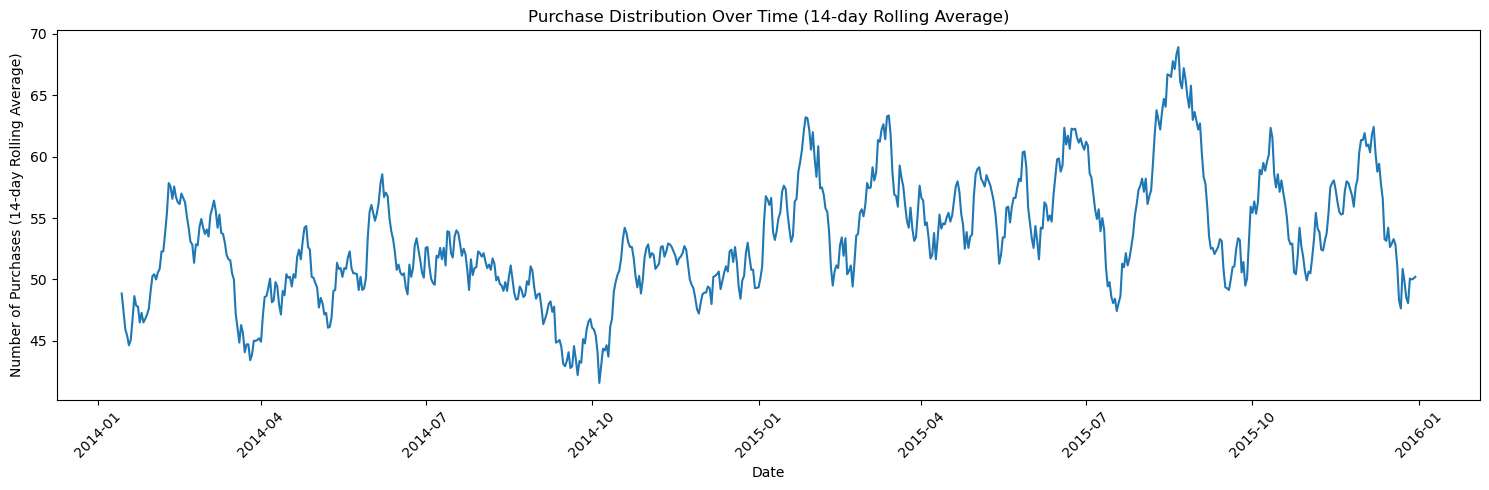

In [104]:
# Visualize purchase distribution over time
# Convert Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Aggregate the data by day and calculate the rolling average over a window of two weeks
purchase_distribution = data.groupby(data['Date'].dt.date).size().rolling(window=14).mean()

# Plot the purchase distribution over time with rolling average
plt.figure(figsize=(15, 5))
purchase_distribution.plot()
plt.title('Purchase Distribution Over Time (14-day Rolling Average)')
plt.xlabel('Date')
plt.ylabel('Number of Purchases (14-day Rolling Average)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


- There are 38,765 rows and 3 columns in the groceries dataset. 
- There are 3,898 unique member numbers, 728 unique dates, and 167 unique item descriptions. 
- There are no missing values in any of the columns. 
- The top 3 popular items are: whole milk: 2502, other vegetables: 1898, rolls/buns: 1716
- The purchase distribution over time, represented by the 14-day rolling average, indicates an upward trend in the number of purchases over the analyzed period. This suggests a potential increase in shopping activity or demand for groceries over time.

# Preprocess Data

In [108]:
# Creating a basket dataframe where each row represents a member's transaction 
# and each column represents an item, denoting the count of each item bought by the member

basket = (data.groupby(['Member_number','itemDescription'])['Date']
          .count().unstack().reset_index().fillna(0).set_index('Member_number'))



In [107]:
basket.head(5)

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [90]:
# Encode transaction counts as binary values (1 for purchased, 0 for not purchased)
def encode_units(x):
    if x < 1:
        return 0
    if x >= 1:
        return 1



In [110]:
# Apply the encoding function to the entire basket dataframe
basket = basket.applymap(encode_units)

basket.head(3)

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [184]:
# Selecting transactions where 'yogurt' is purchased
yogurt_df = basket.loc[basket['yogurt'] == 1]

# Applying the Apriori algorithm to generate frequent itemsets for 'yogurt'
frequent_itemsets = apriori(yogurt_df, min_support=0.15, use_colnames=True)

# Generating association rules from the frequent itemsets using the lift metric
yogurt_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Sorting the association rules based on lift and support
sorted_rules = yogurt_rules.sort_values(['lift','support'], ascending=False).reset_index(drop=True)

# Displaying the top 5 rules after sorting
sorted_rules[:5]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(other vegetables),(whole milk),0.425204,0.532185,0.253853,0.597015,1.121819,0.027566,1.160874,0.188920
1,(whole milk),(other vegetables),0.532185,0.425204,0.253853,0.477002,1.121819,0.027566,1.099040,0.232122
2,"(yogurt, other vegetables)",(whole milk),0.425204,0.532185,0.253853,0.597015,1.121819,0.027566,1.160874,0.188920
3,"(yogurt, whole milk)",(other vegetables),0.532185,0.425204,0.253853,0.477002,1.121819,0.027566,1.099040,0.232122
4,(other vegetables),"(yogurt, whole milk)",0.425204,0.532185,0.253853,0.597015,1.121819,0.027566,1.160874,0.188920


If customers buy 'yogurt' and 'other vegetables' together, they are likely to buy 'whole milk' as well, with a support of 25.39%, a confidence of 59.70%, and a lift of 1.12. This indicates that yogurt and other vegetables are frequently purchased together, and when they are, there is a high likelihood that customers will also buy whole milk.

In [185]:
# Defining a function to identify items frequently bought together with a specified item
def frequently_bought_together(item):
    # Selecting transactions where the specified item is purchased
    item_df = basket.loc[basket[item] == 1]
    
    # Applying the Apriori algorithm to generate frequent itemsets for the specified item
    frequent_itemsets = apriori(item_df, min_support=0.15, use_colnames=True)
    
    # Generating association rules from the frequent itemsets using the lift metric
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
    
    # Sorting the association rules based on lift and support
    sorted_rules = rules.sort_values(['lift', 'support'], ascending=False).reset_index(drop=True)
    
    print('Items frequently bought together with {0}'.format(item))
    
    # Returning the top 5 items with the highest lift and support
    return sorted_rules['consequents'].unique()[:5]


In [186]:
# Example 1
frequently_bought_together('yogurt')

Items frequently bought together with yogurt


array([frozenset({'whole milk'}), frozenset({'other vegetables'}),
       frozenset({'yogurt', 'whole milk'}),
       frozenset({'yogurt', 'other vegetables'}), frozenset({'sausage'})],
      dtype=object)

In [117]:
# Example 2
frequently_bought_together('bottled water')

Items frequently bought together with bottled water


array([frozenset({'whole milk'}), frozenset({'yogurt'}),
       frozenset({'bottled water', 'whole milk'}),
       frozenset({'bottled water', 'yogurt'}),
       frozenset({'other vegetables'})], dtype=object)

In [132]:
# Example 3
frequently_bought_together('brown bread')

Items frequently bought together with brown bread


array([frozenset({'soda'}), frozenset({'rolls/buns'}),
       frozenset({'brown bread', 'soda'}),
       frozenset({'rolls/buns', 'brown bread'}),
       frozenset({'whole milk'})], dtype=object)

In [129]:
# Filtering the dataset to retrieve all items from invoice ID 1012
data[data['Member_number'] == 1012]

# Cross-checking the recommended items from the frequently_bought_together function 
# with the items from invoice ID 1012.
# There are common items between the recommendations and the items purchased in invoice 1012


,Member_number,Date,itemDescription
1831,1012,2015-03-10,frankfurter
2385,1012,2015-03-27,processed cheese
2851,1012,2015-11-19,tropical fruit
7248,1012,2015-11-19,root vegetables
17980,1012,2015-03-10,yogurt
18534,1012,2015-03-27,whole milk
19000,1012,2015-11-19,rolls/buns
23397,1012,2015-11-19,onions
33150,1012,2014-06-22,frozen vegetables
34912,1012,2015-11-19,shopping bags


In [140]:
# Exploring visualization techniques using support and confidence metrics 
# extracted from association rules for yogurt purchases.

support = yogurt_rules.support.values
confidence = yogurt_rules.confidence.values

In [136]:
import networkx as nx
import random
import matplotlib.pyplot as plt

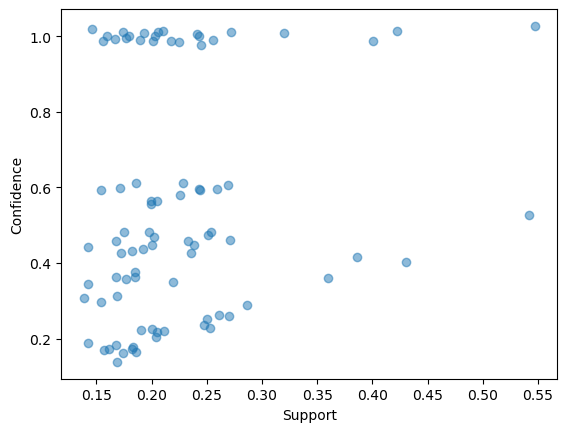

In [139]:
for i in range (len(support)):
    support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
    confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)

# Scatter plot of support vs. confidence    
plt.scatter(support, confidence,   alpha=0.5, marker="o")
plt.xlabel('Support')
plt.ylabel('Confidence') 
plt.show()


In [187]:
def visualize_rules(item, no_of_rules, basket):
   
    # df of item passed
    item_df = basket.loc[basket[item] == 1]

    # Applying apriori algorithm on item df
    frequent_itemsets = apriori(item_df, min_support=0.15, use_colnames=True)

    # Storing association rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

    # Sorting on lift and support
    rules = rules.sort_values(['lift', 'support'], ascending=False).reset_index(drop=True)

    print('Items frequently bought together with {0}'.format(item))

    # Returning top 5 items with highest lift and support
    print(rules['consequents'].head(5).tolist())

    support = rules.support.values
    confidence = rules.confidence.values

    for i in range(len(support)):
        support[i] = support[i] + 0.0025 * (random.randint(1, 10) - 5)
        confidence[i] = confidence[i] + 0.0025 * (random.randint(1, 10) - 5)

    # Creating scatter plot of support vs confidence
    plt.scatter(support, confidence, alpha=0.5, marker="*")
    plt.title('Support vs Confidence graph')
    plt.xlabel('support')
    plt.ylabel('confidence')
    plt.show()

    # Creating a new digraph
    G1 = nx.DiGraph()

    color_map = []
    N = 50
    cmap = plt.get_cmap("viridis", no_of_rules)  # Choose a colormap
    colors = [cmap(i) for i in range(no_of_rules)]

    strs = ['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']

    # adding as many nodes as the number of rules requested by the user
    for i in range(no_of_rules):
        G1.add_node("R"+str(i))

        # adding antecedents to the nodes
        for a in rules.iloc[i]['antecedents']:
            G1.add_node(a)
            G1.add_edge(a, "R"+str(i), weight=2)

        # adding consequents to the nodes
        for c in rules.iloc[i]['consequents']:
            G1.add_node(c)
            G1.add_edge("R"+str(i), c, weight=2)

    for node in G1.nodes():
        if node in strs:
            color_map.append('yellow')
        else:
            color_map.append('green')

    print('Visualization of Rules')

    weights = [G1[u][v]['weight'] for u, v in G1.edges()]

    pos = nx.spring_layout(G1, k=16, scale=1)

    # Use a colormap for edge colors based on weight
    edge_colors = weights

    fig, ax = plt.subplots(figsize=(10, 8))  # Create a new figure and axis

    nx.draw(G1, pos, node_color=color_map, edge_color=edge_colors, cmap=plt.cm.viridis,
            width=weights, font_size=16, with_labels=False, edge_cmap=plt.cm.Blues, ax=ax)  # Use the created axis 'ax' here

    for p in pos:  # raise text positions
        pos[p][1] += 0.07

    nx.draw_networkx_labels(G1, pos, ax=ax)  # Using the created axis 'ax' here

    plt.show()


In [189]:
def visualize_rules(item, no_of_rules, basket):
    # Filter data for the specified item
    item_df = basket.loc[basket[item] == 1]

    # Apply the Apriori algorithm to find frequent itemsets
    frequent_itemsets = apriori(item_df, min_support=0.15, use_colnames=True)

    # Extract association rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

    # Sort the rules by lift and support
    rules = rules.sort_values(['lift', 'support'], ascending=False).reset_index(drop=True)

    # Print top 5 associated items
    print('Top 5 items frequently bought together with {0}:'.format(item))
    print(rules['consequents'].head(5).tolist())

    # Scatter plot of support vs. confidence
    scatter_plot_rules(rules)

    # Visualization of association rules graph
    visualize_rules_graph(rules, no_of_rules)

In [190]:
def scatter_plot_rules(rules):
    # Scatter plot of support vs. confidence
    support = rules.support.values
    confidence = rules.confidence.values

    # Add jitter to avoid overlapping points
    for i in range(len(support)):
        support[i] = support[i] + 0.0025 * (random.randint(1, 10) - 5)
        confidence[i] = confidence[i] + 0.0025 * (random.randint(1, 10) - 5)

    plt.scatter(support, confidence, alpha=0.5, marker="*")
    plt.title('Support vs Confidence')
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.show()

In [191]:
def visualize_rules_graph(rules, no_of_rules):
    # Create a graph to visualize association rules
    G = nx.DiGraph()

    # Add nodes and edges to the graph
    for i in range(no_of_rules):
        rule = rules.iloc[i]
        G.add_node("R"+str(i))
        for a in rule['antecedents']:
            G.add_node(a)
            G.add_edge(a, "R"+str(i), weight=2)
        for c in rule['consequents']:
            G.add_node(c)
            G.add_edge("R"+str(i), c, weight=2)

    # Set node colors after adding nodes to the graph
    color_map = ['red' if node.startswith('R') else 'darkblue' for node in G.nodes()]

    # Draw the graph
    pos = nx.spring_layout(G, k=16, scale=1)
    edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
    fig, ax = plt.subplots(figsize=(10, 8))
    nx.draw(G, pos, node_color=color_map, edge_color=edge_weights, cmap=plt.cm.viridis,
            width=edge_weights, font_size=16, with_labels=False, edge_cmap=plt.cm.Blues, ax=ax)
    for p in pos:
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G, pos, ax=ax)
    plt.title('Visualization of Rules')
    plt.show()



Top 5 items frequently bought together with ice cream:
[frozenset({'rolls/buns'}), frozenset({'rolls/buns'}), frozenset({'rolls/buns', 'ice cream'}), frozenset({'sausage'}), frozenset({'sausage'})]


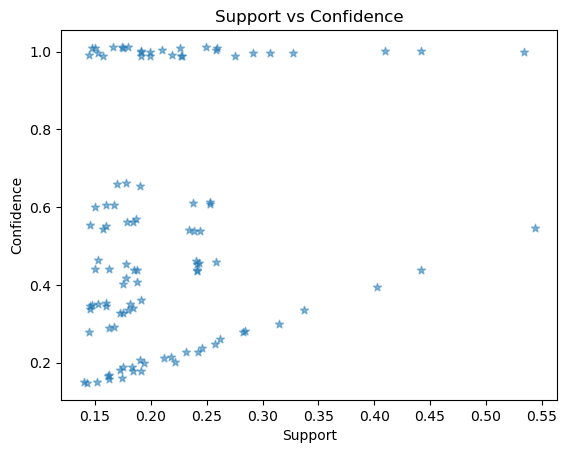

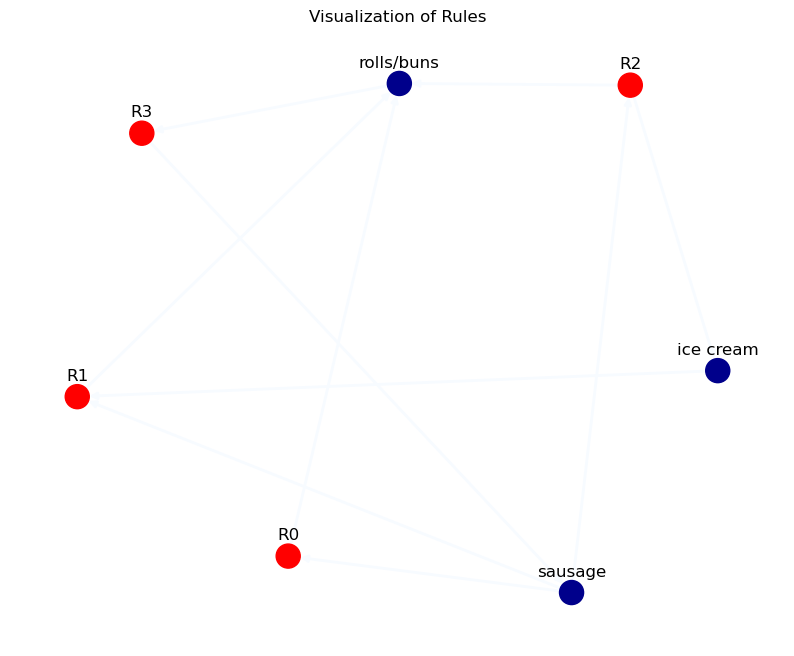

In [165]:
visualize_rules('ice cream', 4, basket)

Top 5 items frequently bought together with yogurt:
[frozenset({'whole milk'}), frozenset({'other vegetables'}), frozenset({'whole milk'}), frozenset({'other vegetables'}), frozenset({'yogurt', 'whole milk'})]


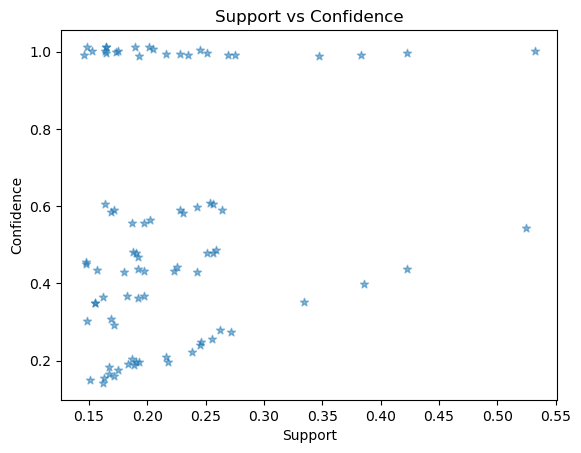

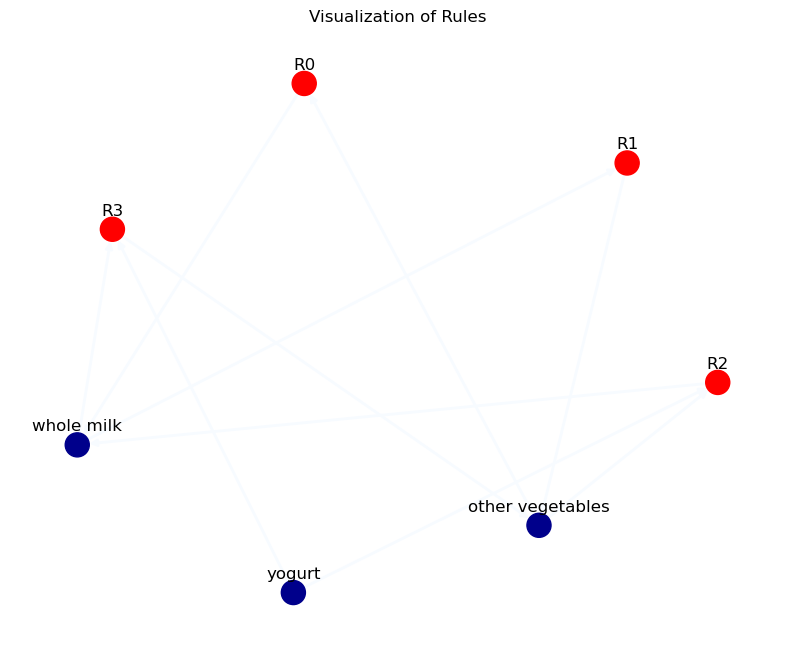

In [183]:
visualize_rules('yogurt', 4, basket)

In [168]:
#visualize_rules('chocolate', 4, basket)
#visualize_rules('butter', 4, basket)
#visualize_rules('white bread', 4, basket)

In [170]:
# Filter transactions containing 'butter'
butter_df = basket.loc[basket['butter'] == 1]

# Find frequent itemsets using Apriori algorithm
frequent_itemsets = apriori(butter_df, min_support=0.15, use_colnames=True)

# Generate association rules based on frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Select top 10 rules by lift
top_rules = rules.sort_values(by='lift', ascending=False).head(10)


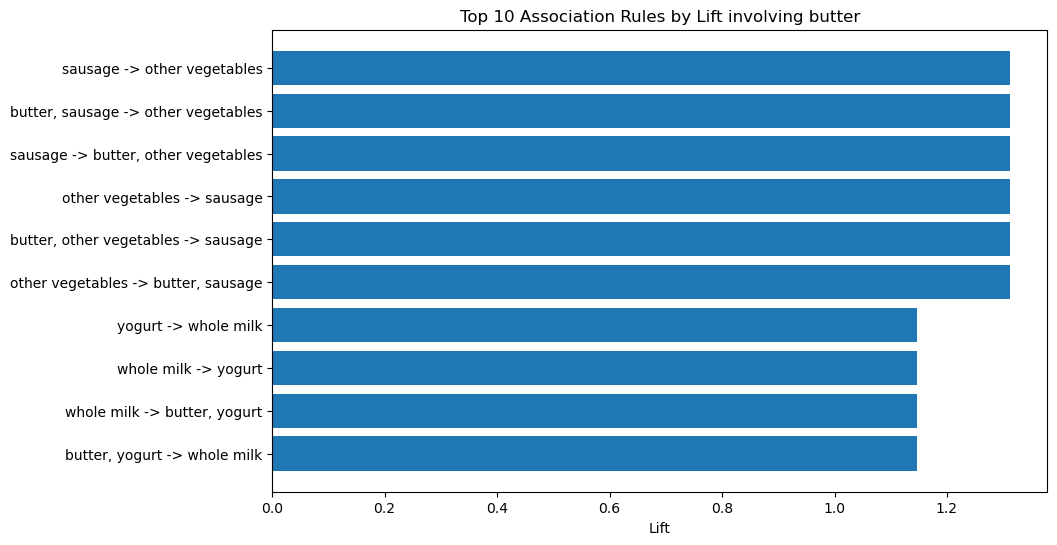

In [206]:
# Convert frozensets to strings for labeling
top_rules['antecedents_str'] = top_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
top_rules['consequents_str'] = top_rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Create a bar chart to visualize top rules by lift
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_rules)), top_rules['lift'], tick_label=top_rules['antecedents_str'] + ' -> ' + top_rules['consequents_str'])
plt.xlabel('Lift')
plt.title('Top 10 Association Rules by Lift involving butter')
plt.gca().invert_yaxis()  # Invert y-axis to show highest lift at the top
plt.show()

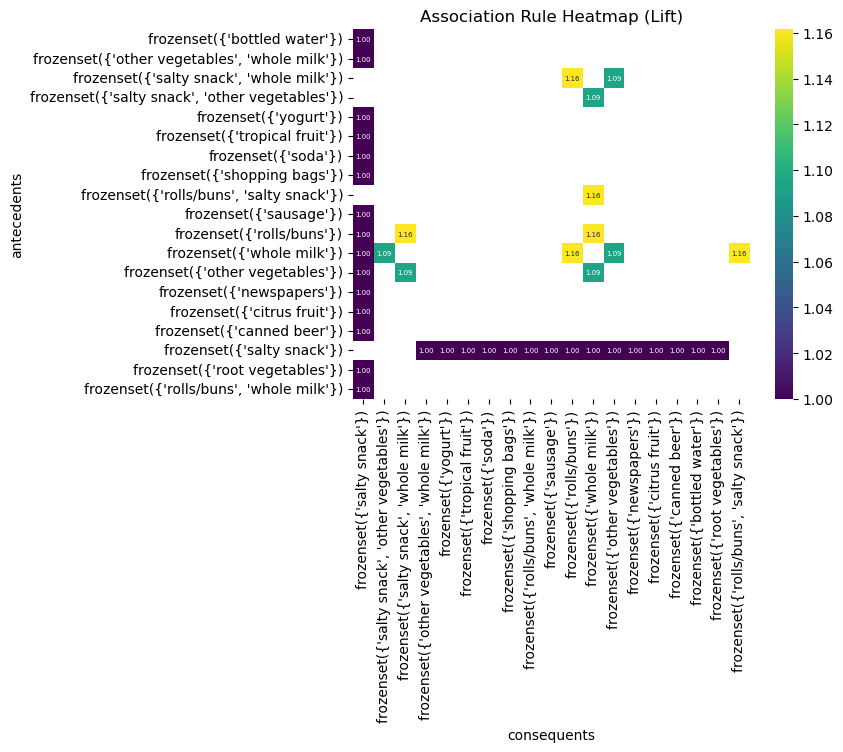

In [177]:
import seaborn as sns

# Filter transactions with 'salty snack'
salty_snack_df = basket.loc[basket['salty snack'] == 1]

# Find frequent itemsets using Apriori
frequent_itemsets = apriori(salty_snack_df, min_support=0.2, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Create heatmap data
heatmap_data = rules.pivot(index='antecedents', columns='consequents', values='lift')

# Plot heatmap
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="viridis",  annot_kws={"fontsize": 5})
plt.title('Association Rule Heatmap (Lift)')
plt.show()



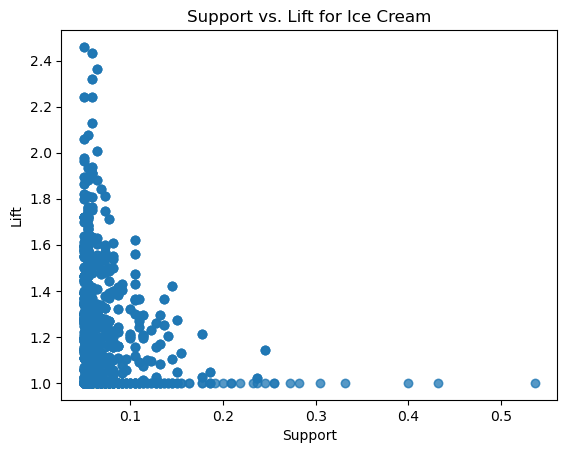

In [180]:
# Visualizing association rules derived from transaction data related to 'ice cream' by plotting support against lift.
# Select transactions containing 'ice cream'
ice_cream_df = basket.loc[basket['ice cream'] == 1]

# Find frequent itemsets with minimum support of 0.05 using Apriori algorithm
frequent_itemsets = apriori(ice_cream_df, min_support=0.05, use_colnames=True)

# Generate association rules with a minimum lift threshold of 1
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Create a scatter plot of support vs. lift for association rules
plt.scatter(rules['support'], rules['lift'], alpha=0.5)

# Set x-axis label
plt.xlabel('Support')

# Set y-axis label
plt.ylabel('Lift')

# Set plot title
plt.title('Support vs. Lift for Ice Cream')

# Display the plot
plt.show()



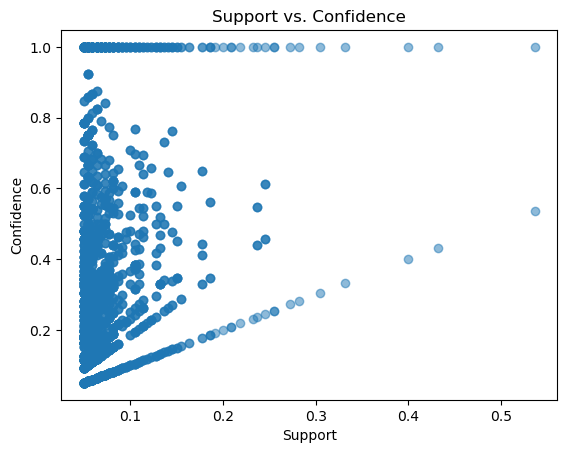

In [181]:
# Visualizing association rules derived from transaction data related to 'ice cream' by plotting support against confidence.
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs. Confidence')
plt.show()

In [201]:
# Review rules with high lift and confidence
high_value_rules = rules[(rules['lift'] > 1.6) & (rules['confidence'] > 0.8)]
print(high_value_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


                                            antecedents  \
551                                     (sausage, beef)   
628                           (pip fruit, bottled beer)   
652                      (tropical fruit, bottled beer)   
1334             (shopping bags, fruit/vegetable juice)   
1340                      (fruit/vegetable juice, soda)   
2052                           (sausage, shopping bags)   
2111                         (sausage, ice cream, beef)   
2116                                    (sausage, beef)   
2134               (pip fruit, ice cream, bottled beer)   
2138                          (pip fruit, bottled beer)   
2190          (ice cream, tropical fruit, bottled beer)   
2194                     (tropical fruit, bottled beer)   
2504  (fruit/vegetable juice, shopping bags, ice cream)   
2511             (shopping bags, fruit/vegetable juice)   
2518           (ice cream, fruit/vegetable juice, soda)   
2523                      (fruit/vegetable juice, soda) 

In [202]:
import pandas as pd
top_15_rules = rules.nlargest(15, 'lift')  # Select top 15 rules based on 'lift'

# Styling the DataFrame for better readability
styled_top_15 = top_15_rules.style.format({
    'support': "{:.2%}",  # Convert to percentage format
    'confidence': "{:.2%}",
    'lift': "{:.2f}"
}).background_gradient(cmap='viridis', subset=['lift'])  # Apply a color gradient based on lift values
styled_top_15


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1336,"frozenset({'fruit/vegetable juice', 'whole milk'})",frozenset({'shopping bags'}),0.109091,0.186364,5.00%,45.83%,2.46,0.029669,1.502098,0.666048
1337,frozenset({'shopping bags'}),"frozenset({'fruit/vegetable juice', 'whole milk'})",0.186364,0.109091,5.00%,26.83%,2.46,0.029669,1.217576,0.729304
2506,"frozenset({'fruit/vegetable juice', 'ice cream', 'whole milk'})",frozenset({'shopping bags'}),0.109091,0.186364,5.00%,45.83%,2.46,0.029669,1.502098,0.666048
2508,"frozenset({'shopping bags', 'ice cream'})","frozenset({'fruit/vegetable juice', 'whole milk'})",0.186364,0.109091,5.00%,26.83%,2.46,0.029669,1.217576,0.729304
2513,"frozenset({'fruit/vegetable juice', 'whole milk'})","frozenset({'shopping bags', 'ice cream'})",0.109091,0.186364,5.00%,45.83%,2.46,0.029669,1.502098,0.666048
2515,frozenset({'shopping bags'}),"frozenset({'fruit/vegetable juice', 'ice cream', 'whole milk'})",0.186364,0.109091,5.00%,26.83%,2.46,0.029669,1.217576,0.729304
653,"frozenset({'tropical fruit', 'whole milk'})",frozenset({'bottled beer'}),0.127273,0.190909,5.91%,46.43%,2.43,0.034793,1.510303,0.674679
656,frozenset({'bottled beer'}),"frozenset({'tropical fruit', 'whole milk'})",0.190909,0.127273,5.91%,30.95%,2.43,0.034793,1.263950,0.727744
2193,"frozenset({'tropical fruit', 'ice cream', 'whole milk'})",frozenset({'bottled beer'}),0.127273,0.190909,5.91%,46.43%,2.43,0.034793,1.510303,0.674679
2195,"frozenset({'ice cream', 'bottled beer'})","frozenset({'tropical fruit', 'whole milk'})",0.190909,0.127273,5.91%,30.95%,2.43,0.034793,1.263950,0.727744


In [207]:
summary_stats = top_15_rules[['support', 'confidence', 'lift', 'conviction']].describe()
print(summary_stats)


         support  confidence       lift  conviction
count  15.000000   15.000000  15.000000   15.000000
mean    0.056364    0.382524   2.429647    1.381415
std     0.005646    0.086353   0.035492    0.131401
min     0.050000    0.268293   2.365591    1.217576
25%     0.050000    0.309524   2.431973    1.263950
50%     0.059091    0.451613   2.431973    1.475401
75%     0.059091    0.458333   2.459350    1.502098
max     0.063636    0.464286   2.459350    1.510303


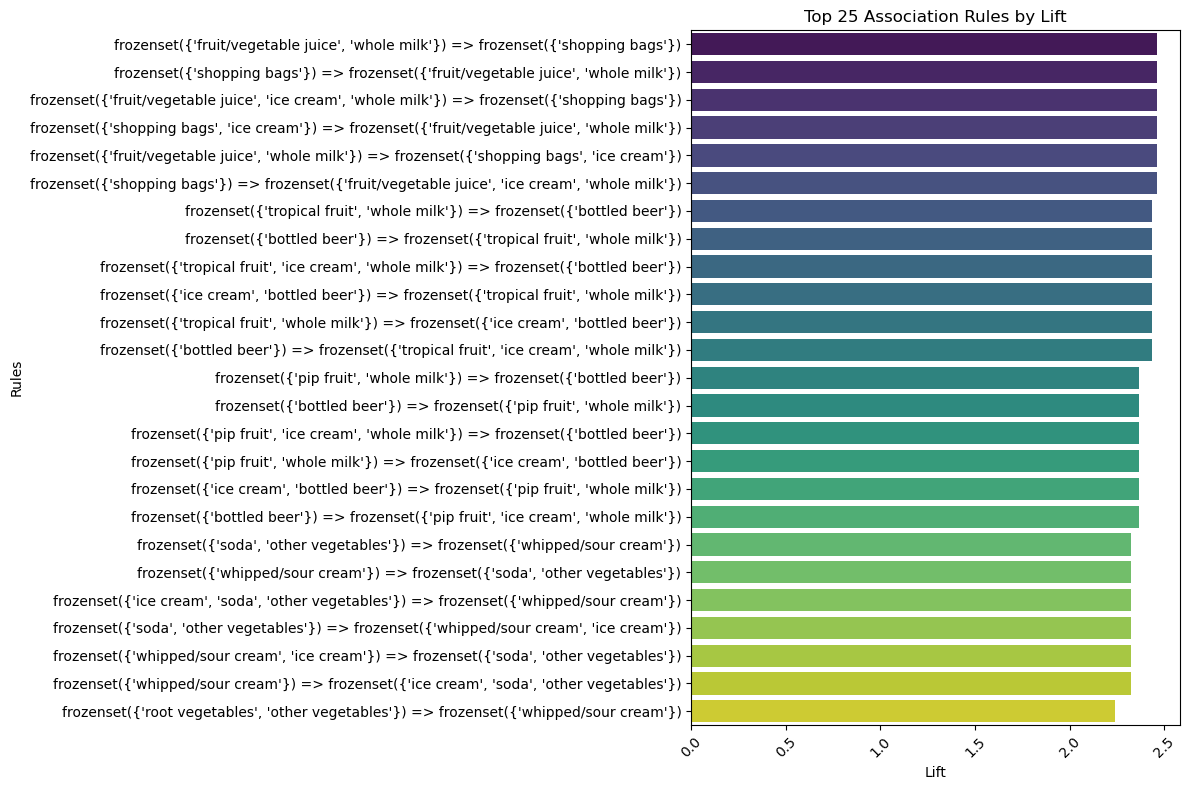

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x='lift', y=top_25_rules['antecedents'].astype(str) + ' => ' + top_25_rules['consequents'].astype(str), data=top_25_rules, palette='viridis')
plt.title('Top 25 Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Rules')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Interpret
Utilizing the Apriori algorithm, this Market Basket Analysis provided precise insights into customer buying patterns, such as the rule pairing sausage and beef with a lift of 1.72 and confidence of 92.31%. These strong associations suggest reliable predictive capabilities for marketing and inventory strategies. Furthermore, the average conviction rate of 1.38 across top rules indicates a reliable dependency between the antecedents and consequents, underscoring the effectiveness of the Apriori algorithm in revealing actionable purchasing trends in retail environments.

# References:

Dedhia, H. (2020, September 17). Groceries dataset. Kaggle. https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset 

prasad22. (2023, October 6). Market basket analysis with Apriori algorithm. Kaggle. https://www.kaggle.com/code/prasad22/market-basket-analysis-with-apriori-algorithm/notebook 

Raschka, S. (n.d.). Association rules - mlxtend. http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/#association-rules-generation-from-frequent-itemsets 